In [57]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import anndata as ad
import pandas as pd

In [58]:
adata = ad.read_h5ad(input_dir+'/LarryData/Larry_41093_2000_norm_log.h5ad')
adata.obs['Cell type annotation'] = adata.obs["state_info"]

In [4]:
input_dir = "/Users/apple/Desktop/KB/data"
output_dir = "/Users/apple/Desktop/KB/SCSeq_LineageBarcoding2/SCSeq_LineageBarcoding/SCLineage_ConstrativeLearning/out/plot/feat_811_train_test"

# Load dataset
train_embeddings = np.load(input_dir+'/feat_811_train_test/bs250_sf05_scCL/scBaseEncoderFeat_Z_bs250_tau0.5.npy')
test_embeddings = np.load(input_dir+'/feat_811_train_test/bs250_sf05_scCL/test_embedding.npy')
print(train_embeddings.shape, test_embeddings.shape)

adata_train = ad.read_h5ad(input_dir+'/LarryData/train_test/Larry_train.h5ad')
adata_test = ad.read_h5ad(input_dir+'/LarryData/train_test/Larry_test.h5ad')
adata_train.obs['Cell type annotation'] = adata_train.obs["state_info"]
adata_test.obs['Cell type annotation'] = adata_test.obs["state_info"]

train_labels = adata_train.obs["clone_id"].to_numpy()
test_labels = adata_test.obs["clone_id"].to_numpy()
print(train_labels.shape, test_labels.shape)


(37207, 64) (3886, 64)
(37207,) (3886,)


In [59]:

# Initialize the KNN classifier (you can adjust the number of neighbors)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier
knn.fit(train_embeddings, train_labels)

# Predict the labels for the test set
y_pred = knn.predict(test_embeddings)

# Calculate the accuracy
accuracy = accuracy_score(test_labels, y_pred)

print(f"KNN classifier accuracy: {accuracy * 100:.2f}%")


KNN classifier accuracy: 2.55%


In [13]:
# Create a DataFrame to compare predictions with actual labels
comparison_df = pd.DataFrame({
    'True Label': test_labels,
    'Predicted Label': y_pred
})

# Add a column indicating whether the prediction was correct
comparison_df['Correct'] = comparison_df['True Label'] == comparison_df['Predicted Label']

# Display the first few rows of the comparison DataFrame
print(comparison_df[comparison_df['Correct']==True])


      True Label  Predicted Label  Correct
19          2370             2370     True
22          2370             2370     True
41          5714             5714     True
62           292              292     True
102         2256             2256     True
...          ...              ...      ...
3059         383              383     True
3256        2476             2476     True
3283        1614             1614     True
3462        5371             5371     True
3743         213              213     True

[99 rows x 3 columns]


In [54]:
correct_df = comparison_df[comparison_df['Correct']==True]
correct_labels = correct_df["True Label"].to_numpy()


false_df = comparison_df[comparison_df['Correct']==False]
false_labels = false_df["True Label"].to_numpy()


In [15]:
correct_labels

array([2370, 2370, 5714,  292, 2256, 2256, 5150, 5150, 3250, 3250, 3851,
       3851, 3646, 2015, 2015, 2887, 2007, 4833,  784, 5081, 3489, 3489,
       3489,  755, 1518, 2189, 5404, 2834, 4226,  417, 1099, 2580, 3093,
       2074, 3592, 3592, 4594,  415, 2598,  681, 4287, 2039, 2039, 3522,
       3932, 3932,  405, 3330,  716, 2791, 2791,  325, 1219, 5717, 5717,
       5807, 5112, 4683, 5024, 4042,  998, 3718, 2302, 4830, 4571, 2431,
       2632, 2272, 3004, 1234,  398,  910,  560,   99,   17, 3914, 1557,
       4674, 2600,  122, 3429,  271, 4086,  120, 2255, 4888,  320, 1318,
       4587, 2268, 1353, 1912, 4005, 5857,  383, 2476, 1614, 5371,  213])

In [20]:
value_counts = adata.obs["clone_id"].value_counts()

In [21]:
value_counts

clone_id
1261    177
2370    165
5714    141
292     134
5209    129
       ... 
513       5
5629      5
1014      5
3998      5
4329      5
Name: count, Length: 2813, dtype: int64

In [23]:
value_counts.max(), value_counts.min()

(177, 5)

In [55]:
# Convert correct labels to a pandas Series
false_labels_series = pd.Series(false_labels)

# Find the corresponding value in value_counts for those correct labels
false_label_value_counts = false_labels_series.map(value_counts)

# Display the resulting counts
print(false_label_value_counts)


0       177
1       177
2       177
3       177
4       177
       ... 
3782     10
3783     10
3784     10
3785     10
3786     10
Length: 3787, dtype: int64


In [60]:
false_label_value_counts.mean()

33.278056509110115

In [61]:
correct_label_value_counts.mean()

49.4040404040404

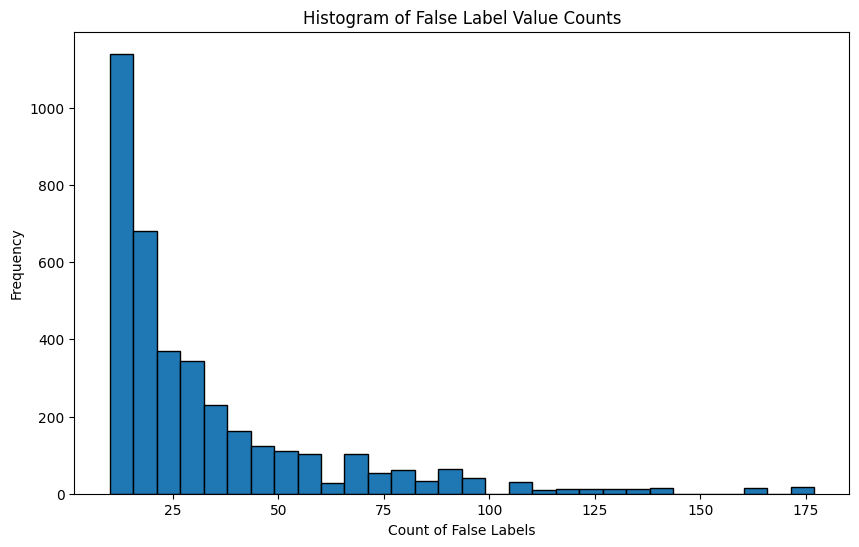

In [62]:
import matplotlib.pyplot as plt

# Plot a histogram of the false_label_value_counts
plt.figure(figsize=(10, 6))
plt.hist(false_label_value_counts, bins=30, edgecolor='black')

# Adding title and labels
plt.title("Histogram of False Label Value Counts")
plt.xlabel("Count of False Labels")
plt.ylabel("Frequency")

# Show the plot
plt.show()


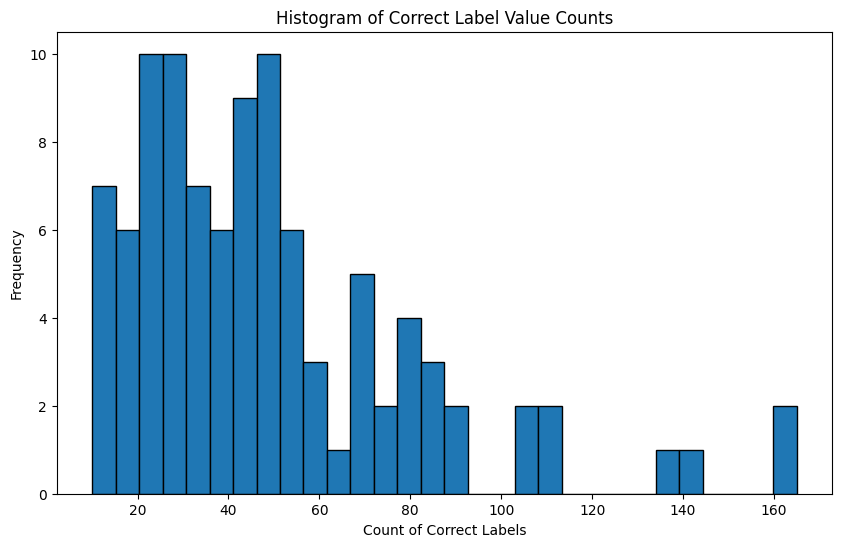

In [64]:
import matplotlib.pyplot as plt

# Plot a histogram of the false_label_value_counts
plt.figure(figsize=(10, 6))
plt.hist(correct_label_value_counts, bins=30, edgecolor='black')

# Adding title and labels
plt.title("Histogram of Correct Label Value Counts")
plt.xlabel("Count of Correct Labels")
plt.ylabel("Frequency")

# Show the plot
plt.show()


In [22]:
# Convert correct labels to a pandas Series
correct_labels_series = pd.Series(correct_labels)

# Find the corresponding value in value_counts for those correct labels
correct_label_value_counts = correct_labels_series.map(value_counts)

# Display the resulting counts
print(correct_label_value_counts)


0     165
1     165
2     141
3     134
4     111
     ... 
94     13
95     12
96     12
97     12
98     10
Length: 99, dtype: int64


In [27]:
correct_labels_series.unique

<bound method Series.unique of 0     2370
1     2370
2     5714
3      292
4     2256
      ... 
94     383
95    2476
96    1614
97    5371
98     213
Length: 99, dtype: int64>

In [36]:

val_count = adata_test.obs["clone_id"].value_counts()
(val_count == 1).sum()

151

In [37]:
# Filter to get the clone_id's where the count is 1
clone_ids_with_count_one = val_count[val_count == 1].index

# Display the clone_ids
print(clone_ids_with_count_one)


Index([4661, 3577, 5023,  269,  132, 3663,  258, 4396, 1416, 4597,
       ...
       2705, 5031, 3061, 4250, 4880, 2040, 4323,  997, 3442, 5355],
      dtype='int64', name='clone_id', length=151)


In [46]:
213 in  set(clone_ids_with_count_one)

True

In [43]:
681 in (set(correct_labels))

True

In [42]:
correct_labels_series.value_counts()

3489    3
2370    2
2015    2
2039    2
3932    2
       ..
4287    1
681     1
2598    1
415     1
213     1
Name: count, Length: 86, dtype: int64

In [48]:
# Create a dictionary where the key is the unique clone_id and the value is the number of unique Cell type annotation
clone_id_dict = (
    adata.obs.groupby('clone_id')['Cell type annotation']
    .nunique()
    .to_dict()
)

# Display the dictionary
print(clone_id_dict)


{0: 1, 1: 1, 2: 2, 4: 1, 5: 2, 8: 3, 10: 2, 12: 1, 13: 2, 15: 2, 17: 1, 18: 2, 21: 2, 23: 2, 25: 2, 29: 2, 30: 1, 34: 2, 36: 1, 37: 1, 38: 3, 39: 2, 42: 1, 43: 2, 44: 1, 45: 2, 47: 2, 49: 2, 50: 2, 51: 2, 52: 2, 53: 2, 54: 2, 56: 3, 57: 1, 60: 1, 63: 1, 64: 1, 66: 2, 67: 3, 68: 2, 69: 5, 72: 2, 80: 2, 81: 1, 82: 2, 84: 2, 88: 1, 90: 2, 93: 2, 96: 2, 98: 2, 99: 3, 101: 2, 102: 2, 107: 1, 113: 1, 118: 2, 120: 1, 121: 2, 122: 2, 123: 3, 124: 2, 125: 2, 129: 2, 130: 2, 132: 2, 134: 2, 135: 1, 136: 2, 138: 2, 140: 2, 141: 2, 142: 1, 143: 1, 146: 2, 147: 1, 149: 1, 150: 1, 151: 3, 152: 3, 153: 2, 154: 2, 155: 4, 157: 1, 159: 2, 163: 3, 166: 2, 168: 2, 170: 1, 172: 1, 174: 2, 176: 1, 177: 2, 179: 2, 180: 2, 181: 1, 182: 1, 188: 2, 189: 2, 190: 2, 191: 2, 195: 1, 198: 2, 200: 1, 201: 2, 202: 1, 205: 2, 210: 2, 211: 1, 212: 2, 213: 2, 214: 2, 216: 2, 219: 1, 220: 1, 221: 3, 227: 1, 228: 2, 233: 2, 235: 2, 236: 1, 237: 2, 238: 2, 242: 2, 244: 2, 245: 2, 246: 1, 248: 2, 249: 2, 250: 3, 252: 2, 25

In [56]:
ls = []
for i in correct_labels:
    # print(i,":", clone_id_dict[i])
    ls.append(clone_id_dict[i])
ls_np = np.array(ls)

lsl = []
for key in clone_id_dict.keys():
    # print(i,":", clone_id_dict[i])
    lsl.append(clone_id_dict[key])
lsl_np = np.array(lsl)

ls_np.mean(), lsl_np.mean()

(2.787878787878788, 1.974049057945254)

In [52]:
adata.obs["Cell type annotation"].unique()

['Undifferentiated', 'Monocyte', 'Neutrophil', 'Baso', 'Erythroid', ..., 'Mast', 'Lymphoid', 'Eos', 'Ccr7_DC', 'pDC']
Length: 11
Categories (11, object): ['Baso', 'Ccr7_DC', 'Eos', 'Erythroid', ..., 'Monocyte', 'Neutrophil', 'Undifferentiated', 'pDC']

In [6]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(train_embeddings, train_labels, test_size=0.2, random_state=42)

# Initialize the KNN classifier (you can adjust the number of neighbors)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier
knn.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"KNN classifier accuracy: {accuracy * 100:.2f}%")


KNN classifier accuracy: 74.32%
